In [13]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
pre_LTD2 = pd.read_pickle('/data/ana_pre_2Hz_reci')
pre_LTD50 = pd.read_pickle('/data/ana_pre_50Hz_reci')
pre_LTD50_uni = pd.read_pickle('/data/ana_pre_50Hz_uni')

In [21]:
pre_LTD2

,Before,After,File name,elimi
107,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071401,30
108,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071902,35
109,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071903,45
110,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071903,30
111,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017080401,40
113,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017072102,25


In [22]:
pre_LTD50

,Before,After,File name,elimi
14,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016091201,60
15,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'ra...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100201,40
16,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100303,60
17,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'raw_am...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100304,55
18,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017021302,35
19,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053101,60


In [23]:
pre_LTD50_uni

,Before,After,File name,elimi
9,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081002,27
10,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081703,40
11,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081002,28
12,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'raw_am...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016092903,17
13,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'raw_am...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016101201,50
20,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017051501,22


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:53: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:81: RuntimeWarning: Mean of empty slice


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


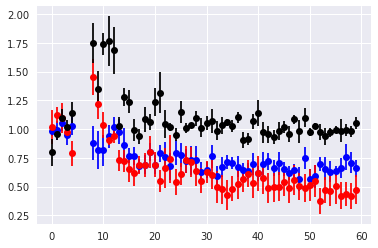

In [33]:
data = pre_LTD2
ave_ptl_resp = np.ones((len(data), 60))*np.nan

for i in range(len(data)):
    bef_resp = data.iloc[i]['Before']['ave_amp1'][-5:]
    bef_rs = np.nanmean(data.iloc[i]['Before']['rs'][-5:])
    aft_rs = np.nanmean(data.iloc[i]['After']['rs'][:(data.iloc[i]['elimi']-7)][-5:])
    aft_resp = data.iloc[i]['After']['ave_amp1'][:(data.iloc[i]['elimi']-7)]*aft_rs/bef_rs
    bef_mean = np.nanmean(bef_resp)
    if aft_resp.shape[0] < 52:
        length_fill = 52 - aft_resp.shape[0]
        mean_fill = np.nanmean(aft_resp[-5:])
        ste_fill =  np.nanstd(aft_resp[-5:])
        np.random.seed(i)
        aft_fill = np.random.normal(loc=mean_fill, scale=ste_fill, size=(1,length_fill))  
        aft_resp = np.concatenate((aft_resp, aft_fill.reshape(-1,1)))
    
    bef_resp = bef_resp/bef_mean
    aft_resp = aft_resp/bef_mean
    resp1_joint= np.concatenate([bef_resp, np.ones((3,1))*np.nan, aft_resp])
    ave_ptl_resp[i,:5] = bef_resp.reshape(1,-1)
    ave_ptl_resp[i,8:] = aft_resp[-52:].reshape(1,-1)
#   plt.figure()
#   plt.plot(resp1_joint, 'o', label='Resp 1')

ave_ptl_mean_2 = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste_2 = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

data = pre_LTD50
ave_ptl_resp = np.ones((len(data), 60))*np.nan

for i in range(len(data)):
    bef_resp = data.iloc[i]['Before']['ave_amp1'][-5:]
    bef_rs = np.nanmean(data.iloc[i]['Before']['rs'][-5:])
    aft_rs = np.nanmean(data.iloc[i]['After']['rs'][:(data.iloc[i]['elimi']-7)][-5:])
    aft_resp = data.iloc[i]['After']['ave_amp1'][:(data.iloc[i]['elimi']-7)]*aft_rs/bef_rs
    bef_mean = np.nanmean(bef_resp)
    if aft_resp.shape[0] < 52:
        length_fill = 52 - aft_resp.shape[0]
        mean_fill = np.nanmean(aft_resp[-5:])
        ste_fill =  np.nanstd(aft_resp[-5:])
        np.random.seed(i)
        aft_fill = np.random.normal(loc=mean_fill, scale=ste_fill, size=(1,length_fill))  
        aft_resp = np.concatenate((aft_resp, aft_fill.reshape(-1,1)))
    
    bef_resp = bef_resp/bef_mean
    aft_resp = aft_resp/bef_mean
    resp1_joint= np.concatenate([bef_resp, np.ones((3,1))*np.nan, aft_resp])
    ave_ptl_resp[i,:5] = bef_resp.reshape(1,-1)
    ave_ptl_resp[i,8:] = aft_resp[-52:].reshape(1,-1)
    
ave_ptl_mean_50 = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste_50 = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')


data = pre_LTD50_uni
ave_ptl_resp = np.ones((len(data), 60))*np.nan

for i in range(len(data)):
    bef_resp = data.iloc[i]['Before']['ave_amp1'][-5:]
    bef_rs = np.nanmean(data.iloc[i]['Before']['rs'][-5:])
    aft_rs = np.nanmean(data.iloc[i]['After']['rs'][:(data.iloc[i]['elimi']-7)][-5:])
    aft_resp = data.iloc[i]['After']['ave_amp1'][:(data.iloc[i]['elimi']-7)]*aft_rs/bef_rs
    bef_mean = np.nanmean(bef_resp)
    if aft_resp.shape[0] < 52:
        length_fill = 52 - aft_resp.shape[0]
        mean_fill = np.nanmean(aft_resp[-5:])
        ste_fill =  np.nanstd(aft_resp[-5:])
        np.random.seed(i)
        aft_fill = np.random.normal(loc=mean_fill, scale=ste_fill, size=(1,length_fill))  
        aft_resp = np.concatenate((aft_resp, aft_fill.reshape(-1,1)))
    
    bef_resp = bef_resp/bef_mean
    aft_resp = aft_resp/bef_mean
    resp1_joint= np.concatenate([bef_resp, np.ones((3,1))*np.nan, aft_resp])
    ave_ptl_resp[i,:5] = bef_resp.reshape(1,-1)
    ave_ptl_resp[i,8:] = aft_resp[-52:].reshape(1,-1)
    
ave_ptl_mean_50_uni = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste_50_uni = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

In [31]:
# Perform processing on before amplitude
def pro_bef(data_mean, data_ste):
    for i in range(len(data_mean)):
        if data_mean[i]+data_ste[i]<1:
            data_mean[i] = 1 - 0.1*data_ste[i]
        elif data_mean[i]-data_ste[i]>1:
            data_mean[i] = 1 + 0.1*data_ste[i]
            
    return data_mean, data_ste

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


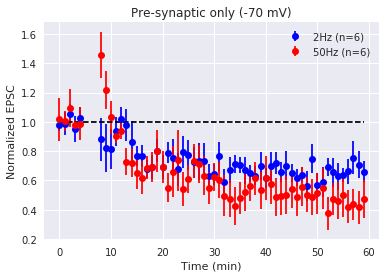

In [34]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_LTD2)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


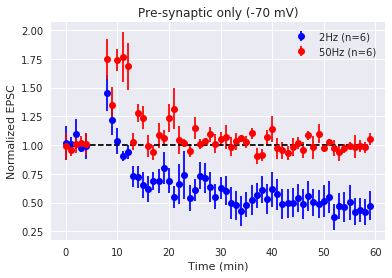

In [35]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='Uni (n={a})'.format(a=len(pre_LTD2)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_LTD50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')